In [21]:
from sklearn.calibration import LabelEncoder
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set_theme(style="white")
sns.set_theme(style="whitegrid", color_codes=True)


In [2]:
df = pd.read_csv('data.csv')
df.head()

,Name,Gender,Count,Probability
0,James,M,5304407,0.014517
1,John,M,5260831,0.014398
2,Robert,M,4970386,0.013603
3,Michael,M,4579950,0.012534
4,William,M,4226608,0.011567


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147269 entries, 0 to 147268
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Name         147269 non-null  object 
 1   Gender       147269 non-null  object 
 2   Count        147269 non-null  int64  
 3   Probability  147269 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.5+ MB


In [5]:
df["Gender"].unique()

array(['M', 'F'], dtype=object)

C:\Users\tcrde\AppData\Local\Temp\ipykernel_4920\4108913712.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='hls')


<Axes: xlabel='Gender', ylabel='count'>

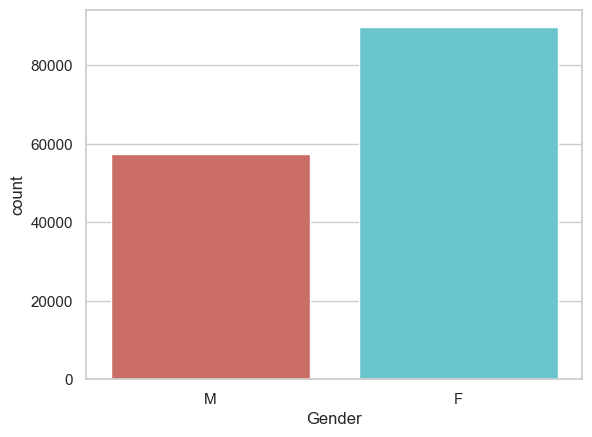

In [6]:
sns.countplot(x='Gender', data=df, palette='hls')

In [7]:
df.isnull().sum()

Name           0
Gender         0
Count          0
Probability    0
dtype: int64

In [27]:

encoder = LabelEncoder()
df['Name_Encoded'] = encoder.fit_transform(df['Name'])
df['Gender'] = df['Gender'].map({'M': 0, 'F': 1})

# Drop rows with missing target values
df.dropna(subset=['Gender'], inplace=True)

X = df[['Name_Encoded']]
y = df['Gender']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)


ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [26]:

# Instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# Fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

ValueError: Input y contains NaN.